In [1]:
import numpy as np
import lusee_sky
import matplotlib.pyplot as plt
import scipy
from scipy.ndimage import gaussian_filter as gfilt
from numpy.fft import rfft


In [2]:
data=np.load('waterfalls/wfall_1.0_50.0_0.25_3.0_30.0.npz',allow_pickle=True)
wf=data['wfall']
freqs=data['freq']

In [41]:
def getSensitivity(wfall, B=1.0):
    # B is bandwidth in MHz
    deltaT = 15*60 ## in mins
    var = ((B*1e6*deltaT)/wfall**2).sum(axis=0)    
    return 1/np.sqrt(var)
typical_var = np.mean([getSensitivity(w) for w in wf],axis=0)    

[]

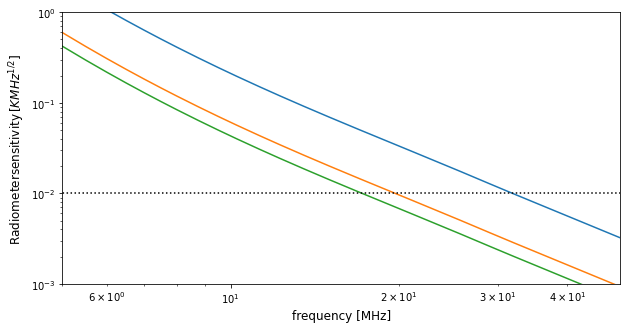

In [60]:
plt.figure(figsize=(10,5))
plt.plot(freqs,typical_var, label='1 night')
plt.plot(freqs,typical_var/np.sqrt(12), label='12 nights')
plt.plot(freqs,typical_var/np.sqrt(24), label='24 nights')
plt.plot(freqs,np.ones_like(freqs)*0.01,'k:')
plt.xlim(5,freqs[-1])
plt.ylim(1e-3,1)
plt.ylabel('${\\rm Radiometer sensitivity} \, [K MHz^{1/2}]$',fontsize=12)
plt.xlabel('frequency [MHz]',fontsize=12)
plt.loglog()

